This dataset contains information about used cars listed on www.cardekho.com This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning. The columns in the given dataset are as follows:

1. Car_Name, basically the brands
2. Year, year of manufacture
3. Selling_Price, quoted selling price
4. Kms_Driven, updated km log
5. Fuel_Type, type of the fuel- petrol/diesel, etc
6. Seller_Type
7. Transmission, manual/automatic
8. Owner- no of times it was purchased earlier
9. Mileage (kmpl)- average mileage of the vehicle	
10. Engine (CC)- engine capacity	
11. Max_power (bhp), horse power	
12. Torque	
13. Seats, no of seats

Business Problem- to identify the most suitable features of the car (columns) that can be used to predict the selling price of a car with the help of the best fit algorithm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read the dataset
cars = pd.read_csv("C:\\Users\\nikhi\\OneDrive\\Desktop\\Social Prachar\\Final Projects\\Regression\\Car Data.csv")
cars

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage (kmpl),engine (CC),max_power (bhp),torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0


Shape of data = 8128 rows × 13 columns

In [3]:
# missing values
cars.isnull().sum()

name                 0
year                 0
selling_price        0
km_driven            0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage (kmpl)     221
engine (CC)        221
max_power (bhp)    216
torque             222
seats              221
dtype: int64

In [4]:
# missing values found in mileage (kmpl), engine (CC), max_power (bhp), torque seats columns

In [5]:
# data types of the columns
cars.dtypes

name                object
year                 int64
selling_price        int64
km_driven            int64
fuel                object
seller_type         object
transmission        object
owner               object
mileage (kmpl)     float64
engine (CC)        float64
max_power (bhp)    float64
torque              object
seats              float64
dtype: object

In [6]:
# no of unique values in each column
cars.nunique()

name               2058
year                 29
selling_price       677
km_driven           921
fuel                  4
seller_type           3
transmission          2
owner                 5
mileage (kmpl)      381
engine (CC)         121
max_power (bhp)     319
torque              441
seats                 9
dtype: int64

In [7]:
# extracting brand from name
cars['brands'] = cars['name'].str.split(expand=True)[0]

In [8]:
# dropping the name as it is a descriptional col and torque as such data cannot be interpreted
del cars['name']
del cars['torque']

In [9]:
# replacing the missing values with the mean
cars['mileage (kmpl)'].fillna(cars['mileage (kmpl)'].mean(), inplace=True)
cars['engine (CC)'].fillna(cars['engine (CC)'].mean(), inplace=True)
cars['max_power (bhp)'].fillna(cars['max_power (bhp)'].mean(), inplace=True)
cars['seats'].fillna(cars['seats'].mean(), inplace=True)

In [10]:
# change data type of seats col
cars['seats'] = cars['seats'].astype('int32')

In [11]:
cars

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage (kmpl),engine (CC),max_power (bhp),seats,brands
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5,Hyundai
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5,Hyundai
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5,Maruti
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5,Tata


In [12]:
# missing values replaced with mean
cars.isnull().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage (kmpl)     0
engine (CC)        0
max_power (bhp)    0
seats              0
brands             0
dtype: int64

In [13]:
cars.describe()

,year,selling_price,km_driven,mileage (kmpl),engine (CC),max_power (bhp),seats
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,8128.000000,8128.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,91.517919,5.405389
std,4.044249,8.062534e+05,5.655055e+04,3.981875,497.017504,35.343246,0.948874
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.800000,1197.000000,68.100000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.418783,1248.000000,83.100000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.277500,1582.000000,101.250000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [14]:
cars.corr()

,year,selling_price,km_driven,mileage (kmpl),engine (CC),max_power (bhp),seats
year,1.000000,0.414092,-0.418006,0.310383,0.017773,0.213282,0.010222
selling_price,0.414092,1.000000,-0.225534,-0.125454,0.453567,0.744958,0.047135
km_driven,-0.418006,-0.225534,1.000000,-0.171426,0.203954,-0.037714,0.219860
mileage (kmpl),0.310383,-0.125454,-0.171426,1.000000,-0.575831,-0.373586,-0.450930
engine (CC),0.017773,0.453567,0.203954,-0.575831,1.000000,0.702152,0.608750
max_power (bhp),0.213282,0.744958,-0.037714,-0.373586,0.702152,1.000000,0.191785
seats,0.010222,0.047135,0.219860,-0.450930,0.608750,0.191785,1.000000


High correlation is observed bewtween 
max_power (bhp) and selling_price 
max_power (bhp) and engine (CC)

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year'>

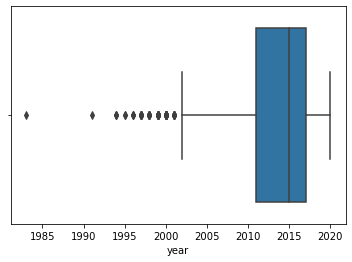

In [15]:
# handling outliers
sns.boxplot(cars['year'])

In [16]:
q1 = cars['year'].quantile(0.25)
q3 = cars['year'].quantile(0.75)
IQR = q3 - q1
IQR

6.0

In [17]:
ul_yr = q3 + 1.5*IQR
ll_yr = q1 - 1.5*IQR

ll_yr, ul_yr

(2002.0, 2026.0)

In [18]:
cars[cars['year']<ll_yr].count()['year'], cars[cars['year']>ul_yr].count()['year']

(81, 0)

In [19]:
cars['year'] = np.where(cars['year'] < ll_yr, ll_yr, cars['year']) 

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='selling_price'>

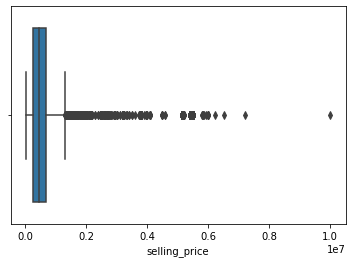

In [20]:
sns.boxplot(cars['selling_price'])

In [21]:
q1 = cars['selling_price'].quantile(0.25)
q3 = cars['selling_price'].quantile(0.75)
IQR = q3 - q1

In [22]:
ul_sp = q3 + 1.5*IQR
ul_sp

1305001.5

In [23]:
cars[cars['selling_price']>ul_sp].count()['selling_price']

600

In [24]:
cars['selling_price'] = np.where(cars['selling_price'] > ul_sp, ul_sp, cars['selling_price']) 

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='km_driven'>

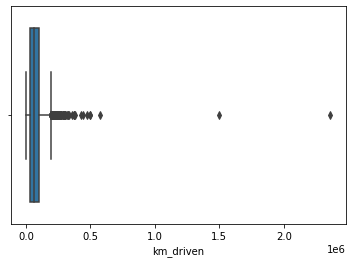

In [25]:
sns.boxplot(cars['km_driven'])

In [26]:
q1 = cars['km_driven'].quantile(0.25)
q3 = cars['km_driven'].quantile(0.75)
IQR = q3 - q1

ul_kd = q3 + 1.5*IQR
ul_kd

192500.0

In [27]:
cars[cars['km_driven']>ul_kd].count()['km_driven']

170

In [28]:
cars['km_driven'] = np.where(cars['km_driven'] > ul_kd, ul_kd, cars['km_driven']) 

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mileage (kmpl)'>

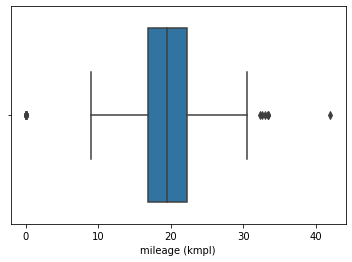

In [29]:
sns.boxplot(cars['mileage (kmpl)'])

In [30]:
q1 = cars['mileage (kmpl)'].quantile(0.25)
q3 = cars['mileage (kmpl)'].quantile(0.75)
IQR = q3 - q1

ul_ml = q3 + 1.5*IQR
ll_ml = q1 - 1.5*IQR

ul_ml, ll_ml

(30.49375, 8.583750000000002)

In [31]:
cars[cars['mileage (kmpl)']>ul_ml].count()['mileage (kmpl)'], cars[cars['mileage (kmpl)']<ll_ml].count()['mileage (kmpl)']

(7, 17)

In [32]:
cars['mileage (kmpl)'] = np.where(cars['mileage (kmpl)'] > ul_ml, ul_ml, cars['mileage (kmpl)'])
cars['mileage (kmpl)'] = np.where(cars['mileage (kmpl)'] < ll_ml, ll_ml, cars['mileage (kmpl)']) 

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine (CC)'>

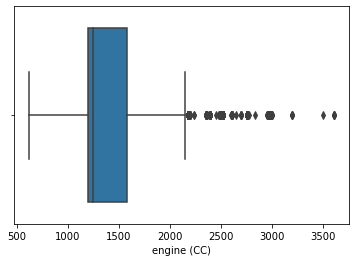

In [33]:
sns.boxplot(cars['engine (CC)'])

In [34]:
q1 = cars['engine (CC)'].quantile(0.25)
q3 = cars['engine (CC)'].quantile(0.75)
IQR = q3 - q1

ul_en = q3 + 1.5*IQR
ul_en

2159.5

In [35]:
cars[cars['engine (CC)']>ul_en].count()['engine (CC)']

1183

In [36]:
cars['engine (CC)'] = np.where(cars['engine (CC)'] > ul_en, ul_en, cars['engine (CC)']) 

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max_power (bhp)'>

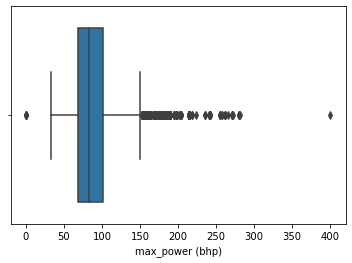

In [37]:
sns.boxplot(cars['max_power (bhp)'])

In [38]:
q1 = cars['max_power (bhp)'].quantile(0.25)
q3 = cars['max_power (bhp)'].quantile(0.75)
IQR = q3 - q1

ul_mp = q3 + 1.5*IQR
ll_mp = q1 - 1.5*IQR
ul_mp, ll_mp

(150.97500000000002, 18.374999999999986)

In [39]:
cars[cars['max_power (bhp)']>ul_mp].count()['max_power (bhp)'], cars[cars['max_power (bhp)']<ll_mp].count()['max_power (bhp)']

(579, 6)

In [40]:
cars['max_power (bhp)'] = np.where(cars['max_power (bhp)'] > ul_mp, ul_mp, cars['max_power (bhp)'])
cars['max_power (bhp)'] = np.where(cars['max_power (bhp)'] < ll_mp, ll_mp, cars['max_power (bhp)']) 

Text(0, 0.5, 'Value')

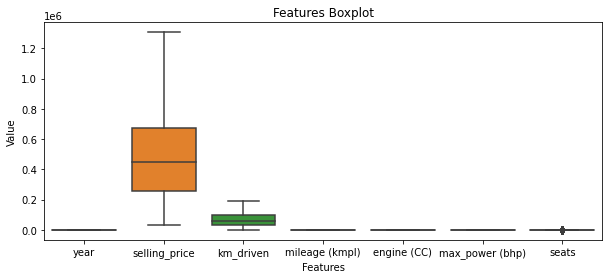

In [41]:
BoxplotCars = pd.melt(cars, 
                     id_vars = ["fuel", "seller_type", "transmission", "owner"],
                     value_vars = ["year", "selling_price", "km_driven", "mileage (kmpl)", "engine (CC)", "max_power (bhp)", "seats"])

plt.figure(figsize=(10, 4))
ax = sns.boxplot(x="variable", y="value", data=BoxplotCars)
plt.title("Features Boxplot")
plt.xlabel("Features")
plt.ylabel("Value")

From the graph, we can see that all the outliers from the respective col are removed 

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

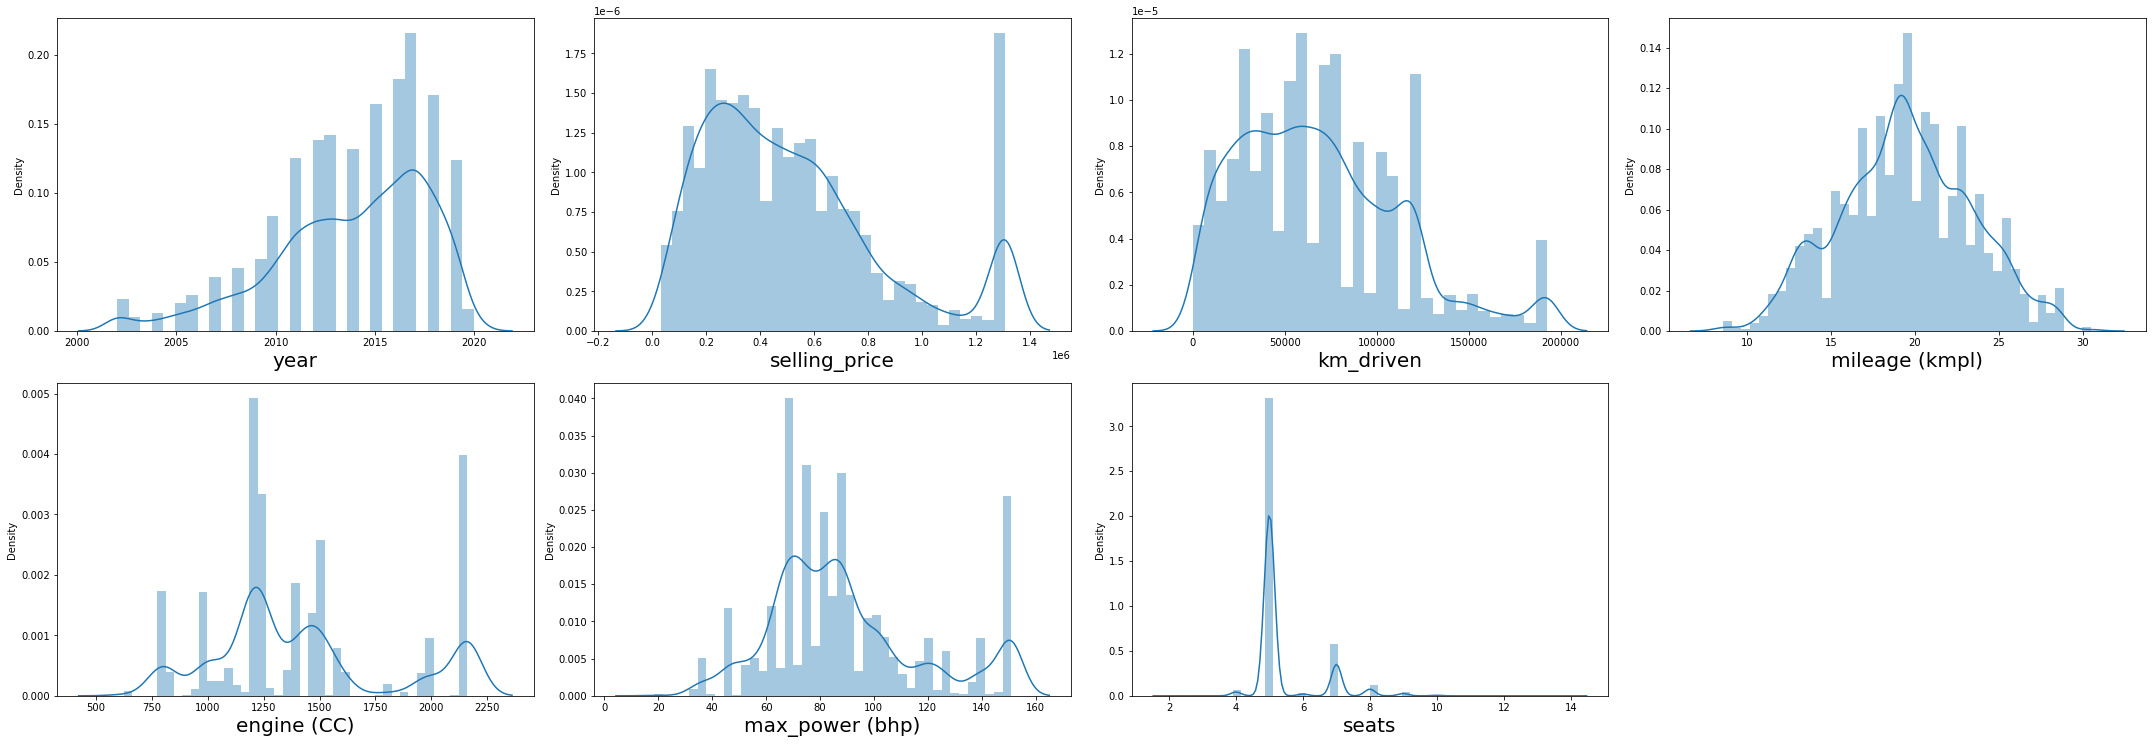

In [42]:
plt.figure(figsize=(30, 20), facecolor='white')
plotnumber=1

for column in ['year', 'selling_price', 'km_driven', 'mileage (kmpl)', 'engine (CC)', 'max_power (bhp)', 'seats']:
    if plotnumber<=16 :
        ax=plt.subplot(4, 4, plotnumber)
        sns.distplot(cars[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()        

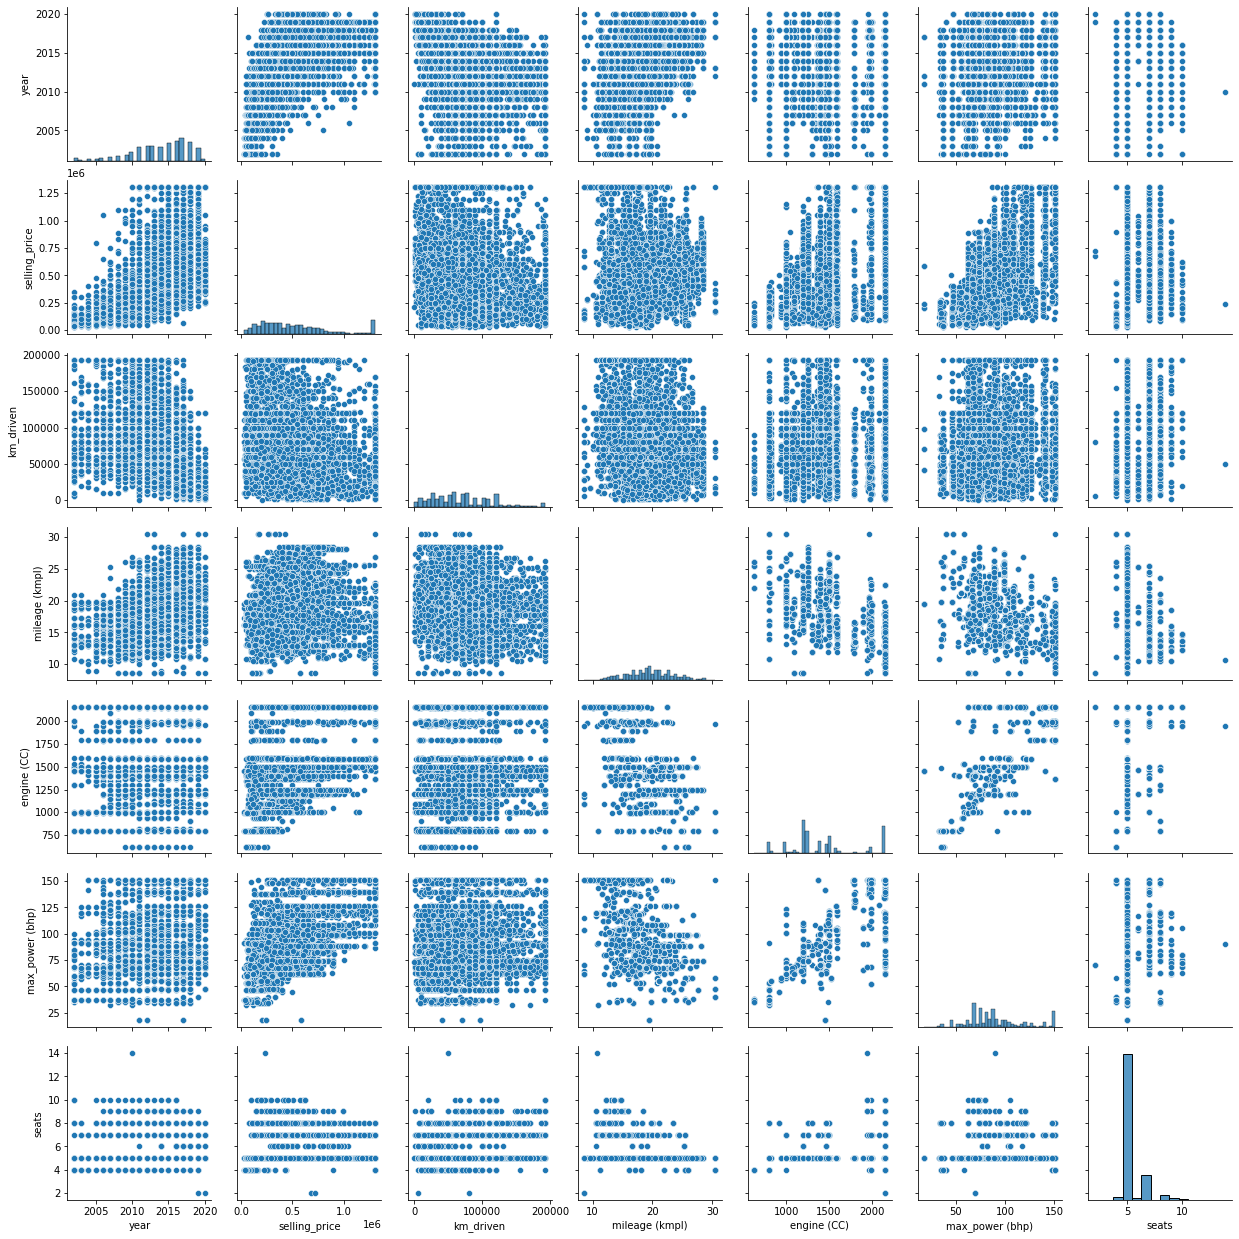

In [43]:
sns.pairplot(cars[['year', 'selling_price', 'km_driven', 'mileage (kmpl)', 'engine (CC)', 'max_power (bhp)', 'seats']]);

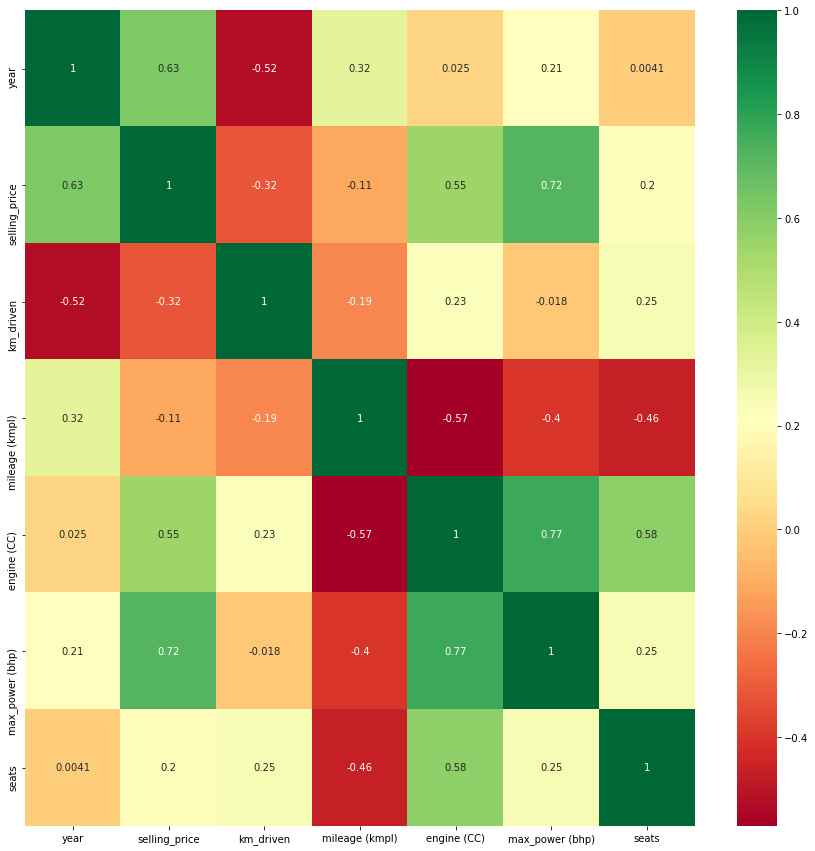

In [44]:
corrmat = cars.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15, 15))
g = sns.heatmap(cars[top_corr_features].corr(), annot = True, cmap = "RdYlGn")

In [45]:
# value count of cars col
cars['owner'].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

In [46]:
# splittint input and output variables
X = cars.drop(columns=['selling_price'])
y = cars[['selling_price']]

In [47]:
# input col
X

,year,km_driven,fuel,seller_type,transmission,owner,mileage (kmpl),engine (CC),max_power (bhp),seats,brands
0,2014.0,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5,Maruti
1,2014.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5,Skoda
2,2006.0,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5,Honda
3,2010.0,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5,Hyundai
4,2007.0,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5,Maruti
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013.0,110000.0,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5,Hyundai
8124,2007.0,119000.0,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5,Hyundai
8125,2009.0,120000.0,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5,Maruti
8126,2013.0,25000.0,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5,Tata


In [48]:
# output col
y

,selling_price
0,450000.0
1,370000.0
2,158000.0
3,225000.0
4,130000.0
...,...
8123,320000.0
8124,135000.0
8125,382000.0
8126,290000.0


In [49]:
# splitting into test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [50]:
# column tranformation for the respective data type
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [51]:
# define
transformer = ColumnTransformer(transformers = [
    ('tn1', OrdinalEncoder(categories = [['First Owner','Second Owner','Third Owner', 'Fourth & Above Owner', 'Test Drive Car']]), ['owner']),
    ('tn2', OneHotEncoder(sparse=False, drop='first'), ['fuel', 'seller_type', 'transmission', 'brands'])],
    remainder='passthrough')

In [52]:
# apply transformation
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [53]:
# scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
# import linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [55]:
# fit the model
lr.fit(X_train, y_train)

LinearRegression()

In [56]:
# train the model
y_pred = lr.predict(X_test)
y_pred

array([[ 689732.54503264],
       [ 538663.28096915],
       [ 919568.58838686],
       ...,
       [1305001.5       ],
       [ 571828.2289489 ],
       [1313985.59509665]])

In [57]:
y_test

,selling_price
2690,415000.0
5021,465000.0
2708,1100000.0
1405,125000.0
2935,950000.0
...,...
5427,270000.0
1253,180000.0
371,1305001.5
7167,475000.0


Text(0, 0.5, 'y_test')

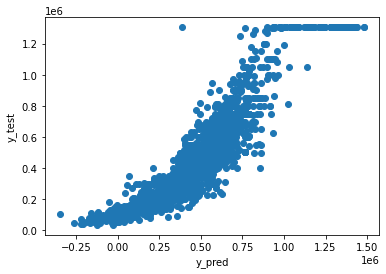

In [58]:
# scatter plot between y_pred, y_test
plt.scatter(y_pred, y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')

We can see the data points following a linear distribution

In [59]:
# find the coefficients and intercept
lr. intercept_, lr.coef_ 

(array([514252.9078745]),
 array([[-14305.87921794,  81774.75890442,   6340.05365334,
          15287.86640899,  -2959.820008  ,  -2637.54809591,
         -25912.632224  ,  -1606.33295209,  14998.00596855,
          11196.66162914, -31653.77288771,   3801.2450435 ,
         -17200.98954814, -12422.21159128,    662.05444105,
         -21981.61624626,  -9466.83963506, -26478.27137877,
           2160.92613979,  12284.41018218,  13529.43606835,
            388.36417146,   4959.49921997,  14164.7779571 ,
           3577.19635497, -25449.19003865, -10904.65426998,
          17138.37954633,   4543.96683619, -10149.99449931,
           1185.67156599,   -861.14136759, -16388.77395619,
         -13351.39703618, -57419.40482402,  23679.90137802,
         -20885.39027443,   7846.12332419, 144407.62227694,
         -38133.3840971 , -23508.21692442,  14414.71511903,
         124630.9542381 ,   8295.69759247]]))

In [60]:
# import validation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [61]:
# MAE
mean_absolute_error(y_test, y_pred)

97785.27946736147

In [62]:
# MSE
mean_squared_error(y_test, y_pred)

16788986325.498629

In [63]:
# RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

129572.32083087278

In [64]:
# R square value
r2 = r2_score(y_test, y_pred)
r2

0.8519357755756214

As the R sqaure value is 0.85 which is near to 1, it can be treated as the best fit model

In [65]:
X_test.shape

(1626, 44)

In [66]:
# Adjusted R square value
1-((1-r2)*(1626-1)/44-1-20)

16.531718984326925

In [67]:
# import L1 and L2 reg models
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [68]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations

lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, y_train)

C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LassoCV(cv=10, max_iter=100000, normalize=True)

In [69]:
alpha = lasscv.alpha_
alpha

2.974564190741214

In [70]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)

C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15708798165121.734, tolerance: 72057843342.24844
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=2.974564190741214)

In [71]:
lasso_reg.score(X_test, y_test)

0.8519443612858637

In [72]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([2.22016331, 6.08551063, 5.36167293, 3.27333063, 3.44289205,
       0.51301411, 3.9465234 , 2.72576419, 2.20386882, 9.20607847,
       3.67719911, 4.89955594, 5.20070154, 2.28322692, 7.63247859,
       4.46808737, 5.78704879, 0.3094785 , 9.23451329, 7.63012056,
       2.6864748 , 5.57498215, 4.54505924, 1.67178994, 6.24400022,
       7.00088823, 0.69747153, 0.53473442, 2.49051561, 6.27754213,
       8.29966838, 5.18636448, 1.9320879 , 6.5226927 , 1.42707121,
       5.81822252, 8.37282262, 6.86683884, 3.00299573, 1.27569286,
       5.87789721, 5.37243929, 5.09883894, 2.29204522, 6.28831239,
       2.83228366, 5.57043348, 2.76913994, 6.35434274, 5.73151845]),
        cv=10, normalize=True)

In [73]:
# best alpha parameter

ridgecv.alpha_

9.234513290069476

In [74]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, y_train)

Ridge(alpha=9.234513290069476)

In [75]:
ridge_model.score(X_test, y_test)

0.8519889641847204

Lasso reg 0.85 and Ridge reg 0.85 which is same as the R square value 

In [76]:
# import polynomial reg
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)

In [77]:
# apply fit and transform poly
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [392]:
# fit and predict the model
lr = LinearRegression()
lr.fit(X_train_poly, y_train)
y_pred_poly = lr.predict(X_test_poly)
r2_score(y_test, y_pred_poly)

0.9250370418397627

R square value is 0.92 which is greater than Linear, L1 and L2.
Hence polynomial regression is the best fit model for the given data set

1. Data cleaning and data pre-processing are important to prepare the data in the correct format before building the regression model
2. Unnecessary data that skew the results were also filtered out
3. To ensure that the numerical variables are not skewed, it’s crucial to remove or impute the missing values and outliers. We imputed the missing values using IQR method.
4. Feature engineering and exploratory data analysis were performed to gather more meaningful information from the data.
5. Derived variables were created using the existing features and skewed variables were scaled.
6. Apart from this, various data visualization, like box plot, dist plot, heat map, pair plot, correlation matrix and scatter plot were created to understand the uni-variate distribution and multi-variate relationship of the data.

In [78]:
import pickle

In [79]:
pickle.dump(lr, open('model.pkl', 'wb'))

In [80]:
model = pickle.load(open('model.pkl', 'rb'))